In [67]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

In [68]:
pd.options.display.max_columns = 45

In [69]:
df = pd.read_csv('../data/feature_510.csv')

In [70]:
df.loc[df['lawyer_gender']==1, 'lawyer_gender']=-1
df.loc[df['lawyer_gender']==0, 'lawyer_gender']=1
df.loc[pd.isnull(df['lawyer_gender']), 'lawyer_gender']=0

In [71]:
df.loc[df['decision']==0, 'decision']=-1

In [72]:
df = df.dropna()

In [75]:
print('There are ', df.shape[0], ' samples.')

('There are ', 5822, ' samples.')


In [76]:
# Shuffle the dataset.
df = shuffle(df, random_state=44)

In [77]:
# Take 60% of the dataset to be the training set, 
# 20% of the dataset to be the validation set, 
# 20% of the dataset to be the test set.
train_set = df.iloc[range(3430)]
val_set = df.iloc[range(3430, 4573)]
test_set = df.iloc[range(4573, 5717)]

In [78]:
df

,docket_id,judge_name,lawyer_gender,judge_gender,Segal/Cover,num_male_lawyer,num_female_lawyer,num_male_ratio_lawyer,num_female_ratio_lawyer,num_male_neutral_lawyer,num_female_neutral_lawyer,num_male_judge,num_female_judge,num_male_ratio_judge,num_female_ratio_judge,ratio_male_neutral_judge,num_male_neutral_judge,ratio_female_neutral_judge,num_female_neutral_judge,judge_interrupt_male,judge_interrupt_female,judge_interrupt_male_judge,judge_interrupt_female_judge,judge_interrupt_male_lawyer,judge_interrupt_female_lawyer,judge_interrupt_male_n,judge_interrupt_female_n,judge_interrupt_male_judge_n,judge_interrupt_female_judge_n,judge_interrupt_male_lawyer_n,judge_interrupt_female_lawyer_n,judge_interrupted_male,judge_interrupted_female,judge_interrupted_male_judge,judge_interrupted_female_judge,judge_interrupted_male_lawyer,judge_interrupted_female_lawyer,judge_interrupted_male_n,judge_interrupted_female_n,judge_interrupted_male_judge_n,judge_interrupted_female_judge_n,judge_interrupted_male_lawyer_n,judge_interrupted_female_lawyer_n,decision_general,decision
2997,2006_05_1345,"Samuel A. Alito, Jr.",1.0,0,0.100,0,0,0,0,0,0,1.000000,0.928571,1.000000,0.353860,0.453694,1.000000,0.474746,1.000000,41,4,1,0,40,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13,1,5,0,8,1,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,2,1.0
8001,2012_12_307,Elena Kagan,0.0,1,0.730,0,0,0,0,0,0,0.132075,0.000000,0.522704,0.000000,0.728031,0.252610,0.734994,0.244444,10,4,0,2,10,2,0.153846,0.600000,0.000000,1.000000,0.230769,0.400000,4,0,2,0,2,0,0.272727,0.000000,1.000000,0.000000,0.111111,0.000000,2,-1.0
5759,2009_09_497,Antonin Scalia,1.0,0,0.000,0,0,0,0,0,0,0.522727,0.090909,0.773516,0.138724,0.796466,0.659763,0.396310,0.671111,215,37,30,0,185,37,1.000000,0.925000,1.000000,0.000000,1.000000,0.925000,52,9,10,3,42,6,1.000000,0.500000,0.500000,0.333333,1.000000,0.545455,1,1.0
6536,2010_10_382,Sonia Sotomayor,1.0,1,0.780,0,0,0,0,0,0,0.853659,1.000000,1.000000,0.690542,0.726717,0.616123,0.653307,0.519774,108,7,10,0,98,7,0.787234,0.000000,1.000000,0.000000,0.772727,0.181818,41,11,13,9,28,2,1.000000,0.750000,1.000000,1.000000,1.000000,0.400000,1,-1.0
7606,2012_11_338,Elena Kagan,1.0,1,0.730,0,0,0,0,0,0,0.132075,0.000000,0.522704,0.000000,0.728031,0.252610,0.734994,0.244444,10,4,0,2,10,2,0.153846,0.600000,0.000000,1.000000,0.230769,0.400000,4,0,2,0,2,0,0.272727,0.000000,1.000000,0.000000,0.111111,0.000000,2,-1.0
928,1999_98_1949,Ruth Bader Ginsburg,1.0,1,0.680,0,0,0,0,0,0,0.507692,0.307692,0.849847,0.625739,0.796798,0.462105,0.619633,0.505636,111,19,11,0,100,19,0.371528,0.218391,0.250000,0.000000,0.384615,0.226190,46,5,12,0,34,5,0.367089,0.263158,0.250000,0.000000,0.472222,0.294118,1,-1.0
65,1998_97_1147,John Paul Stevens,1.0,0,0.250,0,0,0,0,0,0,0.611111,0.444444,0.955526,0.712818,1.000000,0.310680,1.000000,0.373984,718,24,48,0,670,24,0.449121,0.117647,0.387097,0.000000,0.455472,0.117647,277,5,57,0,220,5,0.694656,0.083333,0.587629,0.000000,0.637681,0.092593,1,1.0
6393,2010_10_174,"John G. Roberts, Jr.",0.0,0,0.120,0,0,0,0,0,0,0.170732,0.571429,0.197513,0.389688,0.669634,0.623800,0.631053,0.587571,69,32,2,7,67,25,0.372340,1.000000,0.111111,0.700000,0.420455,1.000000,19,14,9,9,10,5,0.388889,1.000000,0.600000,1.000000,0.307692,1.000000,1,1.0
7383,2012_11_1274,Elena Kagan,1.0,1,0.730,0,0,0,0,0,0,0.132075,0.000000,0.522704,0.000000,0.728031,0.252610,0.734994,0.244444,10,4,0,2,10,2,0.153846,0.600000,0.000000,1.000000,0.230769,0.400000,4,0,2,0,2,0,0.272727,0.000000,1.000000,0.000000,0.111111,0.000000,2,-1.0
2744,2005_04_1544,John Paul Stevens,0.0,0,0.250,0,0,0,0,0,0,0.164706,0.019231,0.203740,0.023415,0.197171,0.852778,0.181811,0.707865,22,1,0,0,22,1,1.000000,0.333333,0.000000,0.000000,1.000000,0.333333,8,0,1,0,7,0,0.437500,0.000000,0.250000,0.000000,0.461538,0.000000,2,-1.0


In [79]:
train_set_dropped = train_set.drop(['docket_id', 'judge_name', 'decision_general', 'num_male_judge', 
                                    'num_female_judge', 'num_male_neutral_judge', 'num_female_neutral_judge',
                                   'judge_interrupt_male', 'judge_interrupt_female', 'judge_interrupt_male_judge',
                                   'judge_interrupt_female_judge', 'judge_interrupt_male_lawyer', 
                                    'judge_interrupt_female_lawyer'], axis=1)
val_set_dropped = val_set.drop(['docket_id', 'judge_name', 'decision_general', 'num_male_judge', 
                               'num_female_judge', 'num_male_neutral_judge', 'num_female_neutral_judge', 
                                'judge_interrupt_male', 'judge_interrupt_female', 'judge_interrupt_male_judge', 
                                'judge_interrupt_female_judge', 'judge_interrupt_male_lawyer', 
                                'judge_interrupt_female_lawyer'], axis=1)
test_set_dropped = test_set.drop(['docket_id', 'judge_name', 'decision_general', 'num_male_judge',
                                 'num_female_judge', 'num_male_neutral_judge', 'num_female_neutral_judge', 
                                  'judge_interrupt_male', 'judge_interrupt_female', 'judge_interrupt_male_judge', 
                                  'judge_interrupt_female_judge', 'judge_interrupt_male_lawyer', 
                                  'judge_interrupt_female_lawyer'], axis=1)

In [80]:
train_set_dropped

,lawyer_gender,judge_gender,Segal/Cover,num_male_lawyer,num_female_lawyer,num_male_ratio_lawyer,num_female_ratio_lawyer,num_male_neutral_lawyer,num_female_neutral_lawyer,num_male_ratio_judge,num_female_ratio_judge,ratio_male_neutral_judge,ratio_female_neutral_judge,judge_interrupt_male_n,judge_interrupt_female_n,judge_interrupt_male_judge_n,judge_interrupt_female_judge_n,judge_interrupt_male_lawyer_n,judge_interrupt_female_lawyer_n,judge_interrupted_male,judge_interrupted_female,judge_interrupted_male_judge,judge_interrupted_female_judge,judge_interrupted_male_lawyer,judge_interrupted_female_lawyer,judge_interrupted_male_n,judge_interrupted_female_n,judge_interrupted_male_judge_n,judge_interrupted_female_judge_n,judge_interrupted_male_lawyer_n,judge_interrupted_female_lawyer_n,decision
2997,1.0,0,0.100,0,0,0,0,0,0,1.000000,0.353860,0.453694,0.474746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13,1,5,0,8,1,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.0
8001,0.0,1,0.730,0,0,0,0,0,0,0.522704,0.000000,0.728031,0.734994,0.153846,0.600000,0.000000,1.000000,0.230769,0.400000,4,0,2,0,2,0,0.272727,0.000000,1.000000,0.000000,0.111111,0.000000,-1.0
5759,1.0,0,0.000,0,0,0,0,0,0,0.773516,0.138724,0.796466,0.396310,1.000000,0.925000,1.000000,0.000000,1.000000,0.925000,52,9,10,3,42,6,1.000000,0.500000,0.500000,0.333333,1.000000,0.545455,1.0
6536,1.0,1,0.780,0,0,0,0,0,0,1.000000,0.690542,0.726717,0.653307,0.787234,0.000000,1.000000,0.000000,0.772727,0.181818,41,11,13,9,28,2,1.000000,0.750000,1.000000,1.000000,1.000000,0.400000,-1.0
7606,1.0,1,0.730,0,0,0,0,0,0,0.522704,0.000000,0.728031,0.734994,0.153846,0.600000,0.000000,1.000000,0.230769,0.400000,4,0,2,0,2,0,0.272727,0.000000,1.000000,0.000000,0.111111,0.000000,-1.0
928,1.0,1,0.680,0,0,0,0,0,0,0.849847,0.625739,0.796798,0.619633,0.371528,0.218391,0.250000,0.000000,0.384615,0.226190,46,5,12,0,34,5,0.367089,0.263158,0.250000,0.000000,0.472222,0.294118,-1.0
65,1.0,0,0.250,0,0,0,0,0,0,0.955526,0.712818,1.000000,1.000000,0.449121,0.117647,0.387097,0.000000,0.455472,0.117647,277,5,57,0,220,5,0.694656,0.083333,0.587629,0.000000,0.637681,0.092593,1.0
6393,0.0,0,0.120,0,0,0,0,0,0,0.197513,0.389688,0.669634,0.631053,0.372340,1.000000,0.111111,0.700000,0.420455,1.000000,19,14,9,9,10,5,0.388889,1.000000,0.600000,1.000000,0.307692,1.000000,1.0
7383,1.0,1,0.730,0,0,0,0,0,0,0.522704,0.000000,0.728031,0.734994,0.153846,0.600000,0.000000,1.000000,0.230769,0.400000,4,0,2,0,2,0,0.272727,0.000000,1.000000,0.000000,0.111111,0.000000,-1.0
2744,0.0,0,0.250,0,0,0,0,0,0,0.203740,0.023415,0.197171,0.181811,1.000000,0.333333,0.000000,0.000000,1.000000,0.333333,8,0,1,0,7,0,0.437500,0.000000,0.250000,0.000000,0.461538,0.000000,-1.0


In [81]:
train_set_dropped = train_set_dropped.drop(['judge_interrupted_male', 'judge_interrupted_female', 
                                           'judge_interrupted_male_judge', 'judge_interrupted_female_judge',
                                           'judge_interrupted_male_lawyer', 'judge_interrupted_female_lawyer'], axis=1)
val_set_dropped = val_set_dropped.drop(['judge_interrupted_male', 'judge_interrupted_female', 
                                       'judge_interrupted_male_judge', 'judge_interrupted_female_judge',
                                       'judge_interrupted_male_lawyer', 'judge_interrupted_female_lawyer'], axis=1)
test_set_dropped = test_set_dropped.drop(['judge_interrupted_male', 'judge_interrupted_female', 
                                         'judge_interrupted_male_judge', 'judge_interrupted_female_judge',
                                         'judge_interrupted_male_lawyer', 'judge_interrupted_female_lawyer'], axis=1)

In [82]:
y_train = train_set_dropped[['decision']]
x_train = train_set_dropped.drop(['decision'], axis=1)
y_val = val_set_dropped[['decision']]
x_val = val_set_dropped.drop(['decision'], axis=1)
y_test = test_set_dropped[['decision']]
x_test = test_set_dropped.drop(['decision'], axis=1)

In [83]:
# List of features involved in modeling.
predictors = list(x_train.columns)

In [84]:
# Convert data frames into numpy ndarrays.
y_train = y_train.values
x_train = x_train.values

y_val = y_val.values
x_val = x_val.values

y_test = y_test.values
x_test = x_test.values

# Adjust the shape of the labels.
y_train = y_train.reshape(y_train.shape[0],)
y_val = y_val.reshape(y_val.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)

In [85]:
models = {}

# Linear Support Vector Classification

In [86]:
from sklearn.svm import LinearSVC

In [87]:
model = LinearSVC()

# Set the grid of parameters among which we will search for
# hyperparameters.
param_grid = {"penalty": ['l2'],
             "loss": ['hinge', 'squared_hinge'], 
             "C": [0.03, 0.1, 0.3, 1, 3],
             "tol": [1e-4, 3e-4, 1e-3]}

clf = GridSearchCV(model, param_grid=param_grid)

In [88]:
clf.fit(x_val, y_val)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'loss': ['hinge', 'squared_hinge'], 'C': [0.03, 0.1, 0.3, 1, 3], 'tol': [0.0001, 0.0003, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [89]:
clf.best_params_

{'C': 0.03, 'loss': 'hinge', 'penalty': 'l2', 'tol': 0.0001}

In [90]:
model = LinearSVC(C=0.03, loss='hinge', penalty='l2', tol=0.0001)
model.fit(x_train, y_train)

LinearSVC(C=0.03, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [92]:
model.score(x_train, y_train)

0.51574344023323615

In [94]:
model.score(x_test, y_test)

0.51136363636363635

In [95]:
models['LinearSVC'] = model

# Decision Tree Classifier

In [96]:
from sklearn.tree import DecisionTreeClassifier 

In [97]:
model = DecisionTreeClassifier()

# Set the grid of parameters among which we will search for 
# hyperparameters.
param_grid = {"criterion": ['gini', 'entropy'],
             "max_depth": np.arange(10, 60, 10),
             "splitter": ['best', 'random'],
             "max_features": [1, 3, 5],
             "min_samples_leaf": [1, 5],
             "min_samples_split": [3, 5, 10]}

clf = GridSearchCV(model, param_grid=param_grid)

In [98]:
clf.fit(x_val, y_val)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'splitter': ['best', 'random'], 'min_samples_leaf': [1, 5], 'min_samples_split': [3, 5, 10], 'criterion': ['gini', 'entropy'], 'max_features': [1, 3, 5], 'max_depth': array([10, 20, 30, 40, 50])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [99]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 1,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'splitter': 'random'}

In [100]:
model = DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_depth = 10, min_samples_leaf = 5, min_samples_split = 5, max_features = 1)
#model = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth = 50, min_samples_leaf = 1, min_samples_split = 10, max_features = 5)


In [101]:
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

In [103]:
# The accuracy of prediction on the training set.
model.score(x_train, y_train)

0.56559766763848396

In [105]:
model.score(x_test, y_test)

0.46328671328671328

Feature ranking:
1. feature lawyer_gender (0.769515)
2. feature judge_interrupted_male_n (0.036642)
3. feature judge_interrupted_male_lawyer_n (0.032731)
4. feature judge_interrupt_male_n (0.032492)
5. feature ratio_female_neutral_judge (0.017916)
6. feature judge_interrupted_female_judge_n (0.017369)
7. feature num_male_ratio_judge (0.016217)
8. feature judge_interrupt_female_n (0.013389)
9. feature ratio_male_neutral_judge (0.012540)
10. feature judge_interrupted_male_judge_n (0.011436)
11. feature judge_interrupt_female_judge_n (0.010661)
12. feature num_female_ratio_judge (0.009695)
13. feature Segal/Cover (0.004942)
14. feature judge_gender (0.004311)
15. feature judge_interrupted_female_lawyer_n (0.003284)
16. feature judge_interrupt_female_lawyer_n (0.003281)
17. feature judge_interrupt_male_lawyer_n (0.002470)
18. feature judge_interrupt_male_judge_n (0.000835)
19. feature judge_interrupted_female_n (0.000272)
20. feature num_female_neutral_lawyer (0.000000)
21. feature num_mal

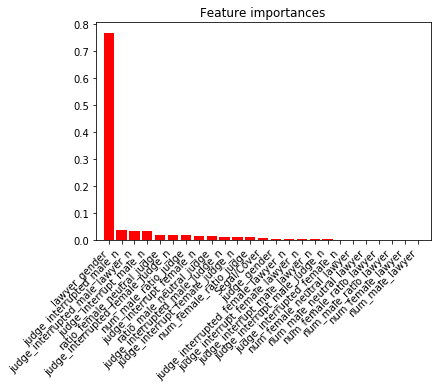

In [106]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
predictors_sorted = [predictors[f] for f in indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(predictors)):
    print("%d. feature %s (%f)" % (f + 1, predictors[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), importances[indices],
       color="r", align="center")
plt.xticks(range(len(predictors)), predictors_sorted, ha='right', rotation=45)
plt.xlim([-1, len(predictors)])
plt.show()

In [107]:
models['DecisionTreeClassifier'] = model

# Random Forest Classifier

In [108]:
model = RandomForestClassifier()

# Set the grid of parameters among which we will search for hyperparameters.
param_grid = {"max_depth": [30, 50, 70, 100, None],
              "min_samples_split": [3, 5, 10],
              "min_samples_leaf": [1, 5],
              "n_estimators": [200],
              "criterion": ['gini', 'entropy']}

clf = GridSearchCV(model, param_grid=param_grid)

In [109]:
clf.fit(x_val, y_val)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [3, 5, 10], 'n_estimators': [200], 'criterion': ['gini', 'entropy'], 'max_depth': [30, 50, 70, 100, None], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [111]:
#model = RandomForestClassifier(criterion = 'entropy', max_depth = 70, min_samples_leaf = 5,min_samples_split = 10, n_estimators = 200)
model = RandomForestClassifier(criterion = 'gini', max_depth = 30, min_samples_leaf = 1,min_samples_split = 3, n_estimators = 200)


In [112]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
# The accuracy of prediction on the training set.
model.score(x_train, y_train)

0.59883381924198253

In [115]:
model.score(x_test, y_test)

0.48076923076923078

Feature ranking:
1. feature lawyer_gender (0.378288)
2. feature num_male_ratio_judge (0.057503)
3. feature ratio_male_neutral_judge (0.055102)
4. feature ratio_female_neutral_judge (0.051282)
5. feature num_female_ratio_judge (0.044265)
6. feature judge_interrupted_male_n (0.035528)
7. feature judge_interrupt_female_n (0.034738)
8. feature judge_interrupted_male_lawyer_n (0.034568)
9. feature judge_interrupt_female_lawyer_n (0.034312)
10. feature judge_interrupt_male_lawyer_n (0.034055)
11. feature judge_interrupted_male_judge_n (0.033697)
12. feature judge_interrupt_male_n (0.032775)
13. feature judge_interrupted_female_n (0.032609)
14. feature judge_interrupt_male_judge_n (0.031875)
15. feature judge_interrupted_female_lawyer_n (0.031828)
16. feature Segal/Cover (0.026581)
17. feature judge_interrupted_female_judge_n (0.025121)
18. feature judge_interrupt_female_judge_n (0.018239)
19. feature judge_gender (0.007635)
20. feature num_female_neutral_lawyer (0.000000)
21. feature num_mal

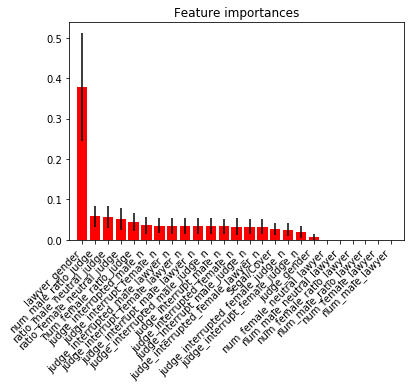

In [116]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
predictors_sorted = [predictors[f] for f in indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(predictors)):
    print("%d. feature %s (%f)" % (f + 1, predictors[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(predictors)), predictors_sorted, ha='right', rotation=45)
plt.xlim([-1, len(predictors)])
plt.show()

In [117]:
models['RandomForestClassifier'] = model

# XGBoost

In [118]:
import xgboost
from xgboost import XGBClassifier
from sklearn.tree import export_graphviz
import graphviz

In [119]:
model = XGBClassifier()

param_grid = {"max_depth": [3, 5, 8, 10], 
             "learning_rate": [0.03, 0.1], 
             "n_estimators": [50, 100, 150, 200], 
             "objective": ['binary:logistic']}

clf = GridSearchCV(model, param_grid=param_grid)

In [120]:
clf.fit(x_val, y_val)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'objective': ['binary:logistic'], 'learning_rate': [0.03, 0.1], 'max_depth': [3, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [121]:
clf.best_params_

{'learning_rate': 0.03,
 'max_depth': 8,
 'n_estimators': 50,
 'objective': 'binary:logistic'}

In [122]:
#model = XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 200, objective = 'binary:logistic')
#model = XGBClassifier(learning_rate = 0.1, max_depth = 10, n_estimators = 50, objective = 'binary:logistic')
model = XGBClassifier(learning_rate = 0.03, max_depth = 8, n_estimators = 50, objective = 'binary:logistic')
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [123]:
model.score(x_train, y_train)

0.59883381924198253

In [124]:
model.score(x_test, y_test)

0.47902097902097901

In [126]:
model.score(x_val, y_val)

0.51793525809273844

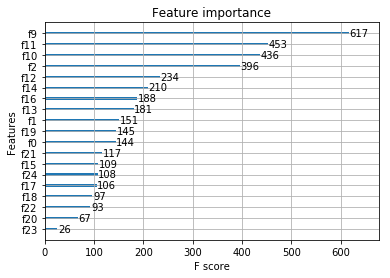

['num_male_ratio_judge', 'ratio_male_neutral_judge', 'num_female_ratio_judge', 'Segal/Cover', 'ratio_female_neutral_judge', 'judge_interrupt_female_n', 'judge_interrupt_female_judge_n', 'judge_interrupt_male_n', 'judge_gender', 'judge_interrupted_male_n', 'lawyer_gender', 'judge_interrupted_male_judge_n', 'judge_interrupt_male_judge_n', 'judge_interrupted_female_lawyer_n', 'judge_interrupt_male_lawyer_n', 'judge_interrupt_female_lawyer_n', 'judge_interrupted_female_judge_n', 'judge_interrupted_female_n', 'judge_interrupted_male_lawyer_n', 'num_female_neutral_lawyer', 'num_male_neutral_lawyer', 'num_female_ratio_lawyer', 'num_male_ratio_lawyer', 'num_female_lawyer', 'num_male_lawyer']


In [127]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
predictors_sorted = [predictors[f] for f in indices]

xgboost.plot_importance(model)
plt.show()

print(predictors_sorted)

In [129]:
graph = xgboost.to_graphviz(model)
graph.render(filename='img/XGBClassifier_v2')

'img/XGBClassifier_v2.pdf'

In [130]:
y_result = model.predict(x_test)

In [131]:
test_set.loc[:,'prediction_result'] = y_result

In [132]:
test_set

,docket_id,judge_name,lawyer_gender,judge_gender,Segal/Cover,num_male_lawyer,num_female_lawyer,num_male_ratio_lawyer,num_female_ratio_lawyer,num_male_neutral_lawyer,num_female_neutral_lawyer,num_male_judge,num_female_judge,num_male_ratio_judge,num_female_ratio_judge,ratio_male_neutral_judge,num_male_neutral_judge,ratio_female_neutral_judge,num_female_neutral_judge,judge_interrupt_male,judge_interrupt_female,judge_interrupt_male_judge,...,judge_interrupt_female_lawyer,judge_interrupt_male_n,judge_interrupt_female_n,judge_interrupt_male_judge_n,judge_interrupt_female_judge_n,judge_interrupt_male_lawyer_n,judge_interrupt_female_lawyer_n,judge_interrupted_male,judge_interrupted_female,judge_interrupted_male_judge,judge_interrupted_female_judge,judge_interrupted_male_lawyer,judge_interrupted_female_lawyer,judge_interrupted_male_n,judge_interrupted_female_n,judge_interrupted_male_judge_n,judge_interrupted_female_judge_n,judge_interrupted_male_lawyer_n,judge_interrupted_female_lawyer_n,decision_general,decision,prediction_result
838,1999_98_1701,William H. Rehnquist,0.0,0,0.045,0,0,0,0,0,0,0.492308,0.076923,0.721625,0.136984,0.881773,0.494737,1.000000,0.489533,144,26,24,...,23,0.486111,0.298851,0.714286,1.000000,0.461538,0.273810,42,8,12,1,30,7,0.316456,0.421053,0.250000,0.200000,0.416667,0.411765,2,-1.0,1.0
4172,2008_07_463,John Paul Stevens,1.0,0,0.250,0,0,0,0,0,0,0.490741,0.111111,0.553483,0.107677,0.334695,0.961913,0.297520,0.906722,87,9,5,...,9,0.241935,0.304348,0.153846,0.000000,0.239316,0.304348,19,3,4,2,15,1,0.142857,0.333333,0.000000,0.500000,0.192308,0.166667,1,-1.0,-1.0
7113,2011_10_895,Ruth Bader Ginsburg,1.0,1,0.680,0,0,0,0,0,0,0.606557,0.307692,0.641041,0.313761,1.000000,0.686717,0.724552,0.664032,94,24,10,...,14,0.144231,0.391304,1.000000,0.368421,0.127451,0.200000,22,8,11,4,11,4,0.177778,0.444444,0.407407,0.142857,0.066667,0.800000,1,-1.0,1.0
4156,2008_07_1601,Ruth Bader Ginsburg,-1.0,1,0.680,0,0,0,0,0,0,0.351852,0.222222,0.473426,0.256917,1.000000,0.768822,1.000000,0.747599,115,12,12,...,12,0.467742,0.434783,0.692308,0.000000,0.418803,0.434783,49,3,19,0,30,3,1.000000,0.333333,1.000000,0.000000,0.769231,0.500000,1,1.0,1.0
2125,2004_03_377,Ruth Bader Ginsburg,1.0,1,0.680,0,0,0,0,0,0,0.380000,0.250000,0.704517,0.305909,0.965701,0.471698,0.593843,0.419580,154,15,15,...,15,0.428571,0.818182,0.192308,0.000000,0.513889,0.818182,86,2,33,0,53,2,0.780000,0.222222,0.825000,0.000000,0.750000,0.400000,1,-1.0,-1.0
6804,2011_10_1472,Elena Kagan,1.0,1,0.730,0,0,0,0,0,0,0.442623,1.000000,0.458740,1.000000,0.729311,0.704261,0.863430,0.758893,81,17,10,...,14,0.019231,0.086957,1.000000,0.000000,0.000000,0.200000,36,11,27,10,9,1,0.488889,0.777778,1.000000,1.000000,0.000000,0.200000,1,1.0,1.0
4966,2008_07_1356,"John G. Roberts, Jr.",1.0,0,0.120,0,0,0,0,0,0,0.453704,1.000000,0.528030,1.000000,0.433233,0.851196,0.473729,0.816187,181,11,10,...,11,1.000000,0.391304,0.538462,0.000000,1.000000,0.391304,45,5,9,4,36,1,0.885714,0.666667,0.333333,1.000000,1.000000,0.166667,1,-1.0,-1.0
6305,2010_09_868,Ruth Bader Ginsburg,-1.0,1,0.680,0,0,0,0,0,0,0.658537,0.857143,0.816750,0.626667,1.000000,0.566219,0.813056,0.500000,68,11,4,...,7,0.361702,0.160000,0.333333,0.400000,0.386364,0.181818,20,4,6,1,14,3,0.416667,0.166667,0.300000,0.000000,0.461538,0.600000,2,1.0,1.0
5174,2009_08_1457,Anthony M. Kennedy,1.0,0,0.365,0,0,0,0,0,0,0.363636,0.000000,0.567236,0.000000,0.958154,0.594675,1.000000,0.511111,89,18,18,...,18,0.408451,0.450000,0.571429,0.000000,0.383784,0.450000,17,5,3,0,14,5,0.166667,0.166667,0.000000,0.000000,0.333333,0.454545,2,-1.0,-1.0
5899,2010_09_1227,Ruth Bader Ginsburg,1.0,1,0.680,0,0,0,0,0,0,0.658537,0.857143,0.816750,0.626667,1.000000,0.566219,0.813056,0.500000,68,11,4,...,7,0.361702,0.160000,0.333333,0.400000,0.386364,0.181818,20,4,6,1,14,3,0.416667,0.166667,0.300000,0.000000,0.461538,0.600000,2,1.0,1.0


In [133]:
test_set.judge_name.unique()

array(['William H. Rehnquist', 'John Paul Stevens', 'Ruth Bader Ginsburg',
       'Elena Kagan', 'John G. Roberts, Jr.', 'Anthony M. Kennedy',
       'Antonin Scalia', 'David H. Souter', 'Stephen G. Breyer',
       'Sonia Sotomayor', "Sandra Day O'Connor", 'Samuel A. Alito, Jr.'], dtype=object)

In [134]:
summary = pd.DataFrame()

justices = test_set.judge_name.unique()
prediction_accuracy = []
for i in test_set.judge_name.unique():
    test_set_justice = test_set[test_set['judge_name']==i]
    a=test_set_justice[test_set_justice['decision']==test_set_justice['prediction_result']].shape[0]
    b=test_set_justice.shape[0]
    someNum=1.0*a/b
    prediction_accuracy.append(someNum)
    print(someNum)

0.553191489362
0.47
0.434782608696
0.450980392157
0.510416666667
0.474452554745
0.513513513514
0.505617977528
0.464285714286
0.474576271186
0.475
0.454545454545


In [135]:
summary['justice'] = justices
summary['prediction_accuracy'] = prediction_accuracy

In [136]:
summary

,justice,prediction_accuracy
0,William H. Rehnquist,0.553191
1,John Paul Stevens,0.470000
2,Ruth Bader Ginsburg,0.434783
3,Elena Kagan,0.450980
4,"John G. Roberts, Jr.",0.510417
5,Anthony M. Kennedy,0.474453
6,Antonin Scalia,0.513514
7,David H. Souter,0.505618
8,Stephen G. Breyer,0.464286
9,Sonia Sotomayor,0.474576
